# A TIME SERIES NOTEBOOK


A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.Time series analysis is extensively used to forecast company sales, product demand, stock market trends, agricultural production etc.The fundamental idea for time series analysis is to decompose the original time series into several independent components.
Example - sales, stock market trends etc... 
 

### Terms to be known in Time Series

Time series analysis is to decompose the original time series into several independent components.

Typically, business time series are divided into the following four components:

- Trend – overall direction of the series i.e. upwards, downwards etc.

- Seasonality – monthly or quarterly patterns.

- Cycle – long-term business cycles, they usually come after 5 or 7 years.

- Irregular remainder – random noise left after extraction of all the components


The Time Series mining function provides the following algorithms to predict future trends:
- Autoregressive Integrated Moving Average (ARIMA)
- Exponential Smoothing
- Seasonal Trend Decomposition

### Time Series Model Performance Checking

- Mean Forcast Error
- Mean absolute Error
- Root Mean Squared Error
- Mean Squared error

### Types of data in Time Series


### Stationarize a Time Series

### ARIMA Forecasting

An autoregressive integrated moving average (ARIMA) model is an generalization of an autoregressive moving average (ARMA) model.Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting).

ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.
There are three parameters $(p, d, q)$ that are used to parametrize ARIMA models. Hence, an ARIMA model is denoted as $ARIMA(p, d, q)$.Each of these three parts is an effort to make the time series stationary, i. e. make the final residual a white noise pattern.
 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [35]:
dataset=pd.read_csv("PH-Sales.csv")

In [36]:
dataset.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [39]:
#uding pandas date_range function generating a set of dates with frequency "MONTHLY" till th length of the dataset
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [40]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [42]:
#adding new columns to the dataset
dataset['month']=dates.month
dataset['year']=dates.year

In [43]:
dataset.head()

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [45]:
#changing the numerical value in the month to categorical column
dataset['month']=dataset['month'].apply(lambda x:calendar.month_abbr[x])

In [46]:
dataset.head()

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [47]:
#As we have month and year seperately we gonna drop "Month-Year"
dataset.drop(['Month-Year'],axis=1,inplace=True)

In [52]:
#Renaming the column name 
dataset.rename(columns={'Number of Tractor Sold':'Tractor-Sales'},inplace=True)
dataset.set_index(dates,inplace=True)

In [53]:
dataset.head()

,Tractor-Sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [57]:
dataset=dataset[['month','year','Tractor-Sales']] # Rearranging the columns

In [58]:
dataset.head(2)

,month,year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157


In [61]:
#Seperating Tractor-sales column
sales_ts=dataset['Tractor-Sales']

In [62]:
sales_ts.rolling(window=2)

Rolling [window=2,center=False,axis=0]

In [63]:
rolemean=sales_ts.rolling(window=12).mean()
rolestd=sales_ts.rolling(window=12).std()

In [64]:
#Checking wheather the data is stationary or non stationary
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(sales_ts,autolag='AIC')
#st=adfuller(sales_ts,autolag='AIC')
dftest

(1.1088250591467372,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

#### From the above data it has been clear that the data is non stationary one so lets make it stationary

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(sales_ts,model='multiplicative')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

In [66]:
#Differencing the data to make it stationary
sales_ts.diff(periods=1).head(3)

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
Freq: MS, Name: Tractor-Sales, dtype: float64

In [67]:
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [68]:
sales_ts_log = np.log10(sales_ts)
len(sales_ts_log)


144

In [69]:
#dropping the empty columns
sales_ts_log.dropna(inplace=True)

In [70]:
import statsmodels.tsa.api as smt
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)
sales_ts_log.head(5)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

In [71]:
#ARIMA model to get best p,d,q paramaters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 model - AIC:-732.7302038054515


In [25]:
#Results of ARIMA Model
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
print(best_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 369.768
Date:                            Fri, 07 Apr 2023   AIC                           -731.535
Time:                                    12:47:23   BIC                           -719.684
Sample:                                01-01-2003   HQIC                          -726.720
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3406      0.069     -4.953      0.000      -0.475      -0.206
ar.S.L12       0.9855      0.009   

In [73]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
sales_ts_truth = sales_ts_log['2011-01-01':]
sales_ts_forecasted = pred_dynamic.predicted_mean
#calculating the mean squared error 
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
mse

0.000868770753240767

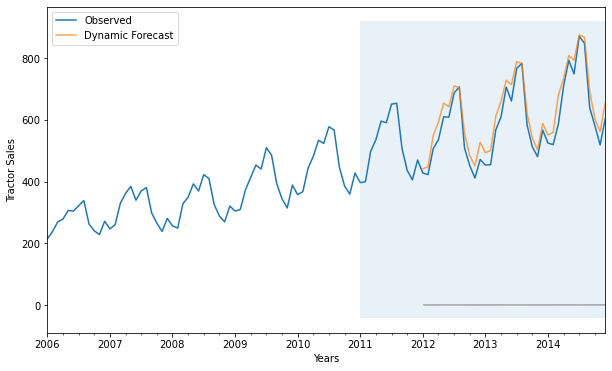

In [74]:
#Plotting the existing tractor sales data 
axis = sales_ts['2006':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2011-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [75]:
#Forecast sales using the best fit ARIMA model
n_steps = 50
pred_uc_99 = best_results.get_forecast(steps=50, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=50, alpha=0.05) # alpha=0.05 signifies 95% Cofidence interval
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns


In [76]:
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.594542,527.162921,611.127132,527.162921,611.127132
2015-01-01,565.244379,517.361293,617.559165,517.361293,617.559165
2015-02-01,662.159528,598.522544,732.562614,598.522544,732.562614
2015-03-01,753.442630,673.491207,842.885240,673.491207,842.885240
2015-04-01,847.359691,749.811187,957.599005,749.811187,957.599005


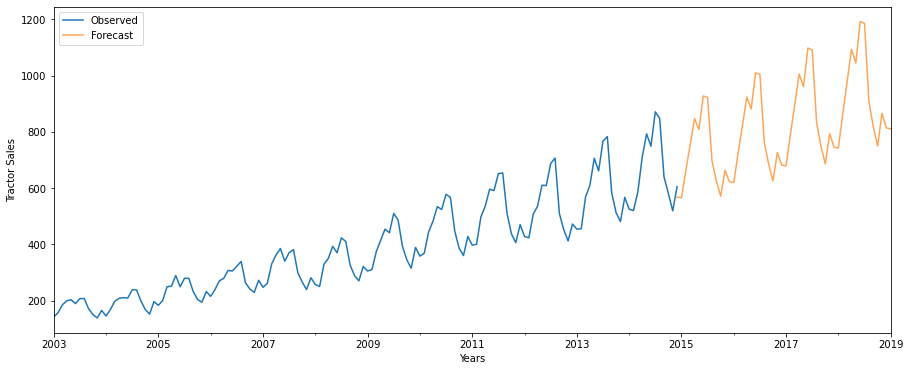

In [57]:
#plotting the forecasted graph and the existing graph 
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

#### I hope you find the notebook useful.Do check the notes that I have attached with this ipynb.

                    ==>Poojha Muralidharan - Artificial Intelligence and Data Science